In [1]:
from urllib import request
resp = request.urlopen('https://movie.douban.com/nowplaying/beijing/')
html_data = resp.read().decode('utf-8')
#print(html_data)

In [2]:
from bs4 import BeautifulSoup as bs
soup = bs(html_data, 'html.parser')    
nowplaying_movie = soup.find_all('div', id='nowplaying')
nowplaying_movie_list = nowplaying_movie[0].find_all('li', class_='list-item') 
#print(nowplaying_movie_list[0])

In [3]:
nowplaying_list = [] 
for item in nowplaying_movie_list:        
        nowplaying_dict = {}        
        nowplaying_dict['id'] = item['data-subject']       
        for tag_img_item in item.find_all('img'):            
            nowplaying_dict['name'] = tag_img_item['alt']            
            nowplaying_list.append(nowplaying_dict)  
            
#print(nowplaying_list)

In [5]:
requrl = 'https://movie.douban.com/subject/' + nowplaying_list[3]['id'] + '/comments' +'?' +'start=0' + '&limit=20' 
resp = request.urlopen(requrl) 
html_data = resp.read().decode('utf-8') 
soup = bs(html_data, 'html.parser') 
comment_div_lits = soup.find_all('div', class_='comment') 

eachCommentList = []; 
for item in comment_div_lits: 
        if item.find_all('p')[0].string is not None:     
            eachCommentList.append(item.find_all('p')[0].string)

print(eachCommentList)

[' 在这种家庭里做一条狗都好啊\n        ', ' 当时出国以后的第一最大感受就是尊重，不论老弱病孕还是任何“与众不同”，都不会有人上下打量你。我不能说他们内心是否真的友善，但是尊重是最起码的原则。希望这个世界多一些善意，任何人都有自己的存在的理由和方式，看到每个人由衷接受Auggie的时候太暖心了。\n        ', ' 所有人都知道是化妆只有我一个人以为请的真实病人出演吗。。。\n        ', ' 有种糖放多了的感觉，精华基本都在预告里了。但对孩子们的纯真友情毫无抵抗力啊，就像被温柔的抚摸了一下软肋。Jacob Tremblay涂着厚厚化妆都能感受到演技，小李子真好意思把奥斯卡摆在家里吗...\n        ', ' 为什么欧文威尔逊和范迪塞尔可以在他们参演的几乎所有电影里都保持同一个发型？\n        ', ' 其实这更像当代童话，因为，实在是太暖了。里面每个人都那么暖，怎么可以那么暖，怎么可以那么暖！像一个暖心的童话故事。虽然，我也怀疑这样故事的真实性，但是，却喜欢被这样暖的故事感动，一度哭到不行。\n        ', ' 秋天排练的话剧春天才会公演，软盘誊抄的论文硬盘才能呈现。你无非是度过了五年级，时间却有魔法经历非凡。躲在卧室里的灵魂最向往蓝天，藏在头盔中的容颜最渴望看见。你其实并没有炸掉死星，楚巴卡会令有些人变得不凡。一杯水能让光影折射，一个男孩能让善良被选择。奥古是杯水，折射出每个人的善意。\n        ', ' 每个人，不论年龄、性别（弟弟、姐姐、姐姐的闺蜜），在成长都会遇到质疑、泪水、冷眼、谎言、误解、痛苦、嘲讽、挣扎、阵痛。都可以在电影《wonder》中找到影子，产生共鸣。《wonder》以小见大，小故事大题材，折射出真善美，勇敢与希望，宽容与理解，不论在任何国度、任何肤色，都是人类永恒的主题。\n        ', ' 买票的时候很纠结，因为是完全可以预料到的剧情。这种温馨少年故事虽各各不同却又次次类似。若是你近来心情疲惫，这部电影是个流泪的好借口。\n        ', ' 一碗甜而不腻的普世价值鸡汤，非常好喝。\n\n看之前我以为是讲主角小男孩的，原来是章回体，每个人都有故事每个人都有视角每个人都有选择。\n\n每个人都很美很好。\n\n开演前基友给我说这部电影就像夏天一样清新，是啊没错，像

In [6]:
comments = ''
for k in range(len(eachCommentList)):
    comments = comments + (str(eachCommentList[k])).strip()
    
#print(comments)

### 去除标点

In [7]:
import re

pattern = re.compile(r'[\u4e00-\u9fa5]+')
filterdata = re.findall(pattern, comments)
cleaned_comments = ''.join(filterdata)

print(cleaned_comments)

在这种家庭里做一条狗都好啊当时出国以后的第一最大感受就是尊重不论老弱病孕还是任何与众不同都不会有人上下打量你我不能说他们内心是否真的友善但是尊重是最起码的原则希望这个世界多一些善意任何人都有自己的存在的理由和方式看到每个人由衷接受的时候太暖心了所有人都知道是化妆只有我一个人以为请的真实病人出演吗有种糖放多了的感觉精华基本都在预告里了但对孩子们的纯真友情毫无抵抗力啊就像被温柔的抚摸了一下软肋涂着厚厚化妆都能感受到演技小李子真好意思把奥斯卡摆在家里吗为什么欧文威尔逊和范迪塞尔可以在他们参演的几乎所有电影里都保持同一个发型其实这更像当代童话因为实在是太暖了里面每个人都那么暖怎么可以那么暖怎么可以那么暖像一个暖心的童话故事虽然我也怀疑这样故事的真实性但是却喜欢被这样暖的故事感动一度哭到不行秋天排练的话剧春天才会公演软盘誊抄的论文硬盘才能呈现你无非是度过了五年级时间却有魔法经历非凡躲在卧室里的灵魂最向往蓝天藏在头盔中的容颜最渴望看见你其实并没有炸掉死星楚巴卡会令有些人变得不凡一杯水能让光影折射一个男孩能让善良被选择奥古是杯水折射出每个人的善意每个人不论年龄性别弟弟姐姐姐姐的闺蜜在成长都会遇到质疑泪水冷眼谎言误解痛苦嘲讽挣扎阵痛都可以在电影中找到影子产生共鸣以小见大小故事大题材折射出真善美勇敢与希望宽容与理解不论在任何国度任何肤色都是人类永恒的主题买票的时候很纠结因为是完全可以预料到的剧情这种温馨少年故事虽各各不同却又次次类似若是你近来心情疲惫这部电影是个流泪的好借口一碗甜而不腻的普世价值鸡汤非常好喝看之前我以为是讲主角小男孩的原来是章回体每个人都有故事每个人都有视角每个人都有选择每个人都很美很好开演前基友给我说这部电影就像夏天一样清新是啊没错像泡在透明干净的玻璃瓶中的黄瓜水一样安心又健康还有甘甜味请多带你们自己和你们的孩子去看看这种电影谢谢能让观众在电影开篇不到分钟就哭出来就很已经厉害了五星推荐不是想象的励志片而是一部关于所有人的成长电影就像那句话说的聪明是一种天赋但是善良是一种选择电影并没有过分渲染小男孩而是多角度展示身边的人最终构建了一个充满天使和爱的世界推荐有孩子的家长看要知道如果你们家有熊孩子不是因为生的不好而是你们教的不好把生而为人很抱歉变成了是个人都应该与人为善多视角还挺有意思的人与人的孤独重量都是同一种地心引力虽然不出意外的所有人都是自带光芒的好人除了故事上有些

### 进行词频统计，先进行中文分词

In [8]:
import jieba    #分词包
import pandas as pd  

segment = jieba.lcut(cleaned_comments)
words_df=pd.DataFrame({'segment':segment})

words_df.head()

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.850 seconds.
Prefix dict has been built succesfully.


,segment
0,在
1,这种
2,家庭
3,里
4,做


### 去除停用词

In [9]:
stopwords=pd.read_csv("stopwords.txt",index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='utf-8')#quoting=3全不引用
words_df=words_df[~words_df.segment.isin(stopwords.stopword)]
words_df.head()

,segment
1,这种
2,家庭
3,里
4,做
5,一条


### 词频统计

In [10]:
import numpy    #numpy计算包
words_stat=words_df.groupby(by=['segment'])['segment'].agg({"计数":numpy.size})
words_stat=words_stat.reset_index().sort_values(by=["计数"],ascending=False)

words_stat.head()

/home/ntyz/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,segment,计数
260,电影,10
218,每个,9
184,故事,7
195,暖,5
113,孩子,5


### 用词云显示

(-0.5, 719.5, 956.5, -0.5)

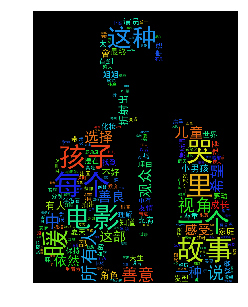

In [19]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
from wordcloud import WordCloud#词云包
from os import path
from PIL import Image

d = path.dirname('__file__')
alice_mask = np.array(Image.open(path.join(d, "alice_mask.png")))
wordcloud=WordCloud(font_path=r'simhei.ttf',background_color="black",max_font_size=100, mask=alice_mask)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}

word_frequence_list = []
for key in word_frequence:
    temp = (key,word_frequence[key])
    word_frequence_list.append(temp)

wordcloud=wordcloud.fit_words(word_frequence_list)
plt.imshow(wordcloud)
plt.axis("off")